<img src="http://www.divephotoguide.com/images/lightboximage/orig/1554077890.jpg"/>

<ul>
    <h3><a>Introduction</a></h3>
    <li>&nbsp;<a>Load All the Depenedent Libraries</a></li>
    <li>&nbsp;<a>Load CSV Data File</a></li>
</ul>
<ul>
    <h3><a>EDA</a></h3>
    <li>&nbsp;<a>Cities Hosting Olympics Over the Years</a></li>
    <li>&nbsp;<a>Pie chart showing the participation ratio on basis of gender</a></li>
    <li>&nbsp;<a>Highest Decorated Male and Female Athelete</a></li>
    <li>&nbsp;<a>Top 5 countries</a></li>
    <li>&nbsp;<a>Medal Count All Across The World</a></li>
    <li>&nbsp;<a>Medals Distribution Of Top 10 Countries</a></li>
    <li>&nbsp;<a>Best Male Athletes & Best Female Athletes</a></li>
    <li>&nbsp;<a>Countries Medals Count In Different Discipline</a></li>
</ul>
<ul>
    <h3><a>India At Olympics</a></h3>
    <li>&nbsp;<a>No Of Participation Over the Years</a></li>
    <li>&nbsp;<a>Pie chart showing the participation ratio on basis of gender</a></li>
    <li>&nbsp;<a>Highest Decorated Male and Female Athelete</a></li>
    <li>&nbsp;<a>Medal In Different Sport W.R.T  </a></li>
    <li>&nbsp;<a>Performance Of India Women's Athelete in Olympic</a></li>
</ul>

In [67]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()


import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)  

# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

import plotly.offline as py
import plotly.graph_objs as go

<h3>Now Explore data</h3>



In [72]:
summerOlympicData=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")

summerOlympicData['Athlete']=summerOlympicData['Athlete'].str.split(', ').str[::-1].str.join(' ')
summerOlympicData['Athlete']=summerOlympicData['Athlete'].str.title()
summerOlympicData.head()

# summerOlympicData.info()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


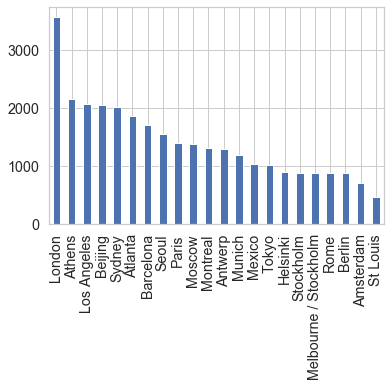

In [64]:
summerOlympicData['City'].value_counts().plot.bar()

In [118]:
import chart_studio.plotly as py
cnt_srs = summerOlympicData['Sport'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Most Popular Sport'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="sport")

ModuleNotFoundError: No module named 'chart_studio'

Text(0.5, 1.0, 'Pie chart showing the participation ratio on basis of gender')

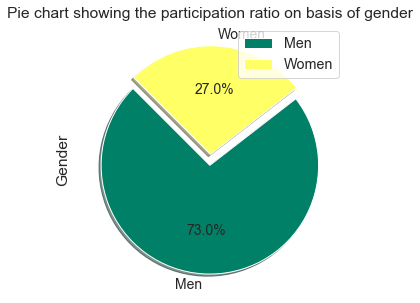

In [74]:
summerOlympicData['Gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True,cmap='summer')

# plt.ylabel('Ownership Type')
plt.title('Pie chart showing the participation ratio on basis of gender')


In [24]:
summerOlympicData[summerOlympicData['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]
# decoratedWomen=summerOlympicData[summerOlympicData['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]



print('The Highest Decorated Male Athlete is: ',
      summerOlympicData[summerOlympicData['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',
      summerOlympicData[summerOlympicData['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')

print('The Highest Decorated Female Athlete is: ',
      summerOlympicData[summerOlympicData['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',
      summerOlympicData[summerOlympicData['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')



The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


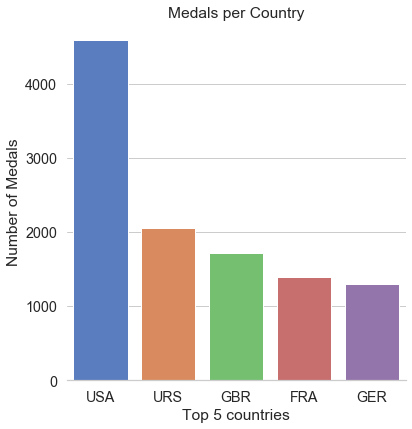

In [69]:
summerOlympicData = summerOlympicData.Country.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=summerOlympicData,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [121]:
medals_map=summerOlympicData.groupby(['Country'])['Medal'].count().reset_index()
medals_map
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = medals_map['Country'],
        z = medals_map['Medal'],
        locationmode = 'Code',
        text = medals_map['Country'].unique(),
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Medals')
            )
       ]

layout = dict(
    title = 'Total Medals By Country (Summer Olympics)',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,0,0)',
        projection = dict(
        type = 'Mercator',
            
        ),
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='olympicMedalsAc')


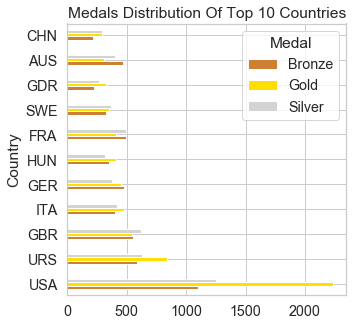

<Figure size 432x288 with 0 Axes>

In [106]:
medals_country=summerOlympicData.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(1)

top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.4,color=['#CD7F32','#FFDF00','#D3D3D3'])

fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Medals Distribution Of Top 10 Countries')
plt.show()
plt.savefig('/Users/parasnandwani10/Documents/insaid/eda/EDA Project/images/top10Countries.png')

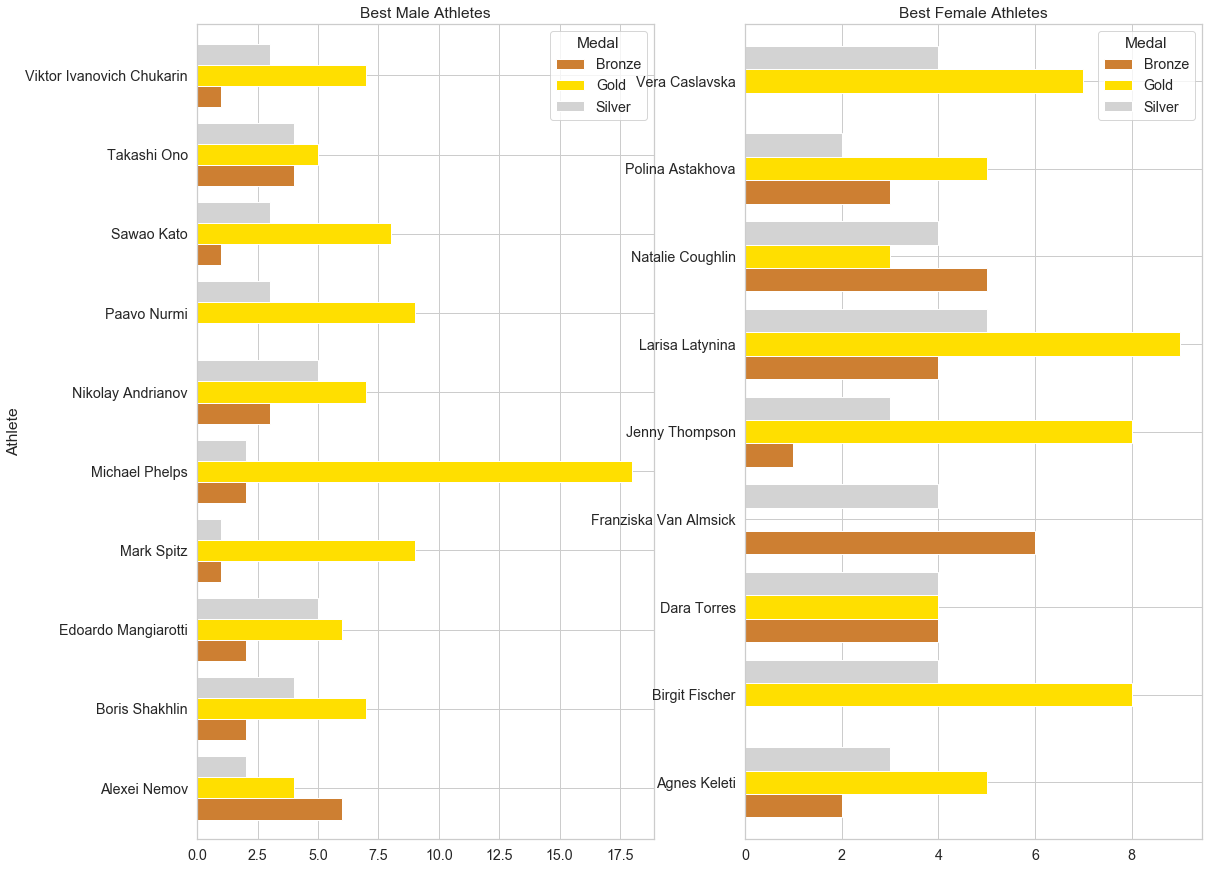

<Figure size 432x288 with 0 Axes>

In [110]:

fig,ax=plt.subplots(1,2,figsize=(18,15))
men=summerOlympicData[summerOlympicData['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
men=men[men['Athlete'].isin(summerOlympicData['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Country')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summerOlympicData[summerOlympicData['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women=women[women['Athlete'].isin(summerOlympicData['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Country')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()
plt.savefig('/Users/parasnandwani10/Documents/insaid/eda/EDA Project/images/top10MaleFemaleComparrisons.png')

<h1>Countries and their medals count in different discpline</h1>

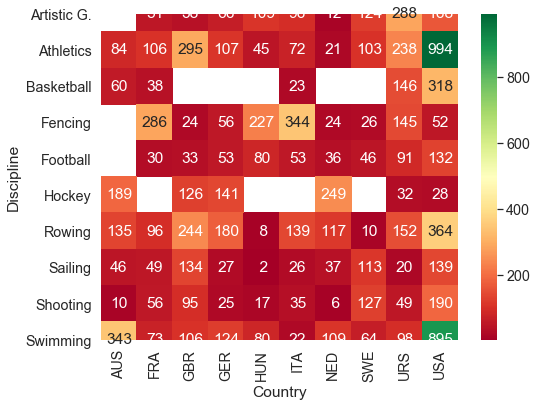

<Figure size 432x288 with 0 Axes>

In [82]:
test=summerOlympicData[summerOlympicData['Country'].isin(summerOlympicData['Country'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(summerOlympicData['Discipline'].value_counts()[:10].index)]
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()


<h1 style="font-family:Arial, Helvetica;">India in Olympic Over the Years</h1>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP05gknDeTbpQsSfApckbtzBJnfeteLFpBVSjzAUxqcWzlyUsn&s"/>

<h1>Medals Count in different sports events corresponding to their discipline</h1>

In [36]:
print("India's Position: ", end='')
medals_country = medals_country.reset_index()
medals_country[medals_country['Country'] == 'IND'].index[0]

India's Position: 

60

In [37]:
india_olympic_data=summerOlympicData[summerOlympicData['Country']=='IND']
print(f'Indian\'s have won {len(india_olympic_data)} medals')

Indian's have won 184 medals


In [111]:
india_sports = pd.pivot_table(india_olympic_data, index='Sport', columns='Medal', aggfunc='count', values='Athlete').fillna(0)
india_sports
# plt.savefig('/Users/parasnandwani10/Documents/insaid/eda/EDA Project/images/countryDiscipline.png')

Medal,Bronze,Gold,Silver
Sport,,,
Athletics,0.0,0.0,2.0
Badminton,1.0,0.0,0.0
Boxing,2.0,0.0,0.0
Hockey,29.0,127.0,13.0
Shooting,1.0,1.0,2.0
Tennis,1.0,0.0,0.0
Weightlifting,1.0,0.0,0.0
Wrestling,3.0,0.0,1.0


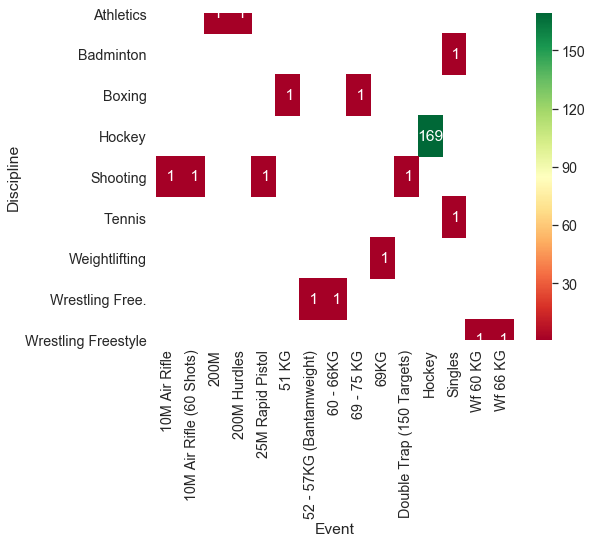

<Figure size 432x288 with 0 Axes>

In [112]:
test=india_olympic_data[india_olympic_data['Country'].isin(india_olympic_data['Country'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(india_olympic_data['Discipline'].value_counts()[:10].index)]
test

test=test.groupby(['Discipline','Event'])['Sport'].count().reset_index()
test=test.pivot('Discipline','Event','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()
plt.savefig('/Users/parasnandwani10/Documents/insaid/eda/EDA Project/images/countryDiscipline.png')

<h1>Participation ratio of Indian players on basis of gender</h1>

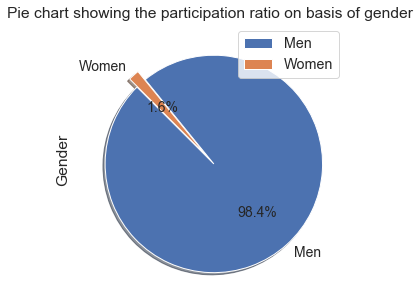

In [90]:
india_olympic_data['Gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True)



plt.title('Pie chart showing the participation ratio on basis of gender')
plt.savefig('/Users/parasnandwani10/Documents/insaid/eda/EDA Project/images/IndiaGender.png')

<h1>Indias Most Decorated Players</h1>

In [117]:
print('The Highest Decorated Male Athlete is: ',
      india_olympic_data[india_olympic_data['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',
      india_olympic_data[india_olympic_data['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')

print('The Highest Decorated Female Athlete is: ',
      india_olympic_data[india_olympic_data['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',
      india_olympic_data[india_olympic_data['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

Mary Kom             1
Saina Nehwal         1
Karnam Malleswari    1
Name: Athlete, dtype: int64
The Highest Decorated Male Athlete is:  Leslie Walter Claudius with:  4  medals
The Highest Decorated Female Athlete is:  Mary Kom with:  1  medals


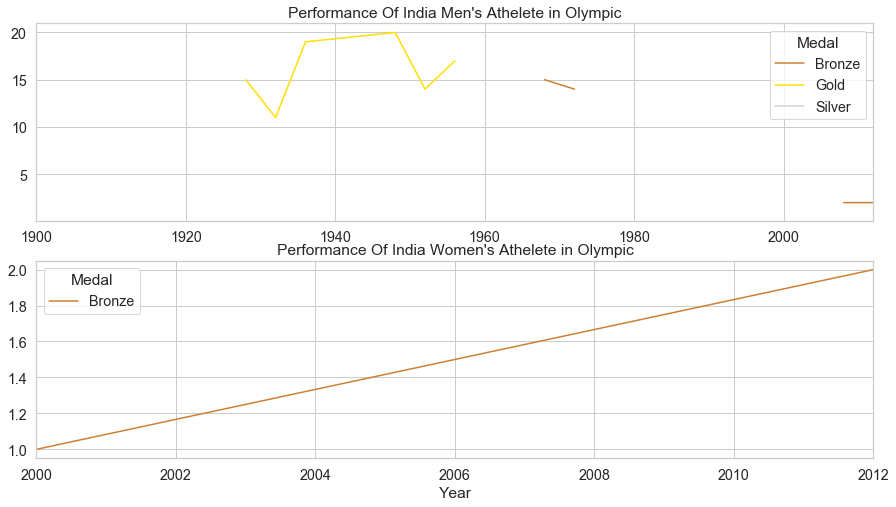

<Figure size 432x288 with 0 Axes>

In [102]:
india_medal_male=summerOlympicData[(summerOlympicData['Country']=='IND')&(summerOlympicData['Gender']=='Men')]
india_medal_female=summerOlympicData[(summerOlympicData['Country']=='IND')&(summerOlympicData['Gender']=='Women')]

fig,ax=plt.subplots(2,figsize=(15,8))
male=india_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title("Performance Of India Men's Athelete in Olympic")
female=india_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title("Performance Of India Women's Athelete in Olympic")
plt.show() 
plt.savefig('/Users/parasnandwani10/Documents/insaid/eda/EDA Project/images/indiamedals.png')